In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

### Dividing  dataset into test and train 

In [2]:
news = fetch_20newsgroups(subset='train')
Text_train = news.data
Y_train = news.target

news_test = fetch_20newsgroups(subset='test')
Text_test = news_test.data
Y_test = news_test.target

In [3]:
Text_train[7]

'From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: Re: IDE vs SCSI\nOrganization: New Mexico State University, Las Cruces, NM\nLines: 44\nDistribution: world\nNNTP-Posting-Host: dante.nmsu.edu\n\nDXB132@psuvm.psu.edu writes:\n>In article <1qlbrlINN7rk@dns1.NMSU.Edu>, bgrubb@dante.nmsu.edu (GRUBB) says:\n>>In PC Magazine April 27, 1993:29 "Although SCSI is twice as fasst as ESDI,\n>>20% faster than IDE, and support up to 7 devices its acceptance ...has   \n>>long been stalled by incompatability problems and installation headaches."\n                                                                      \n>I love it when magazine writers make stupid statements like that re:      \n>performance. Where do they get those numbers? I\'ll list the actual\n>performance ranges, which should convince anyone that such a               \n>statement is absurd:                                                     \n>SCSI-I ranges from 0-5MB/s.                                                \n>SCSI-II ranges

In [4]:
Y_train

array([7, 4, 4, ..., 3, 1, 8])

In [5]:
processor = CountVectorizer(max_features=5000, stop_words='english')
processor.fit(Text_train)
Sparse_train = processor.transform(Text_train)
Sparse_test = processor.transform(Text_test)

In [6]:
Sparse_train

<11314x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 874806 stored elements in Compressed Sparse Row format>

In [7]:
X_train = np.array(Sparse_train.todense())
X_test = np.array(Sparse_test.todense())

In [8]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [9]:
labels = news.target_names
vocabulary = processor.vocabulary_

### LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [11]:
%%time
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, Y_test)))

Training set score: 0.999
Test set score: 0.771
Wall time: 33.5 s


In [12]:
news_text = fetch_20newsgroups()
Text_news = news_text.data
Y_news = news_text.target

processor = CountVectorizer(max_features=5000, stop_words='english')
processor.fit(Text_news)
Sparse_news = processor.transform(Text_news)

X_news = np.array(Sparse_news.todense())

In [13]:
logreg = LogisticRegression()
logreg.fit(X_news, Y_news)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(logreg,X_news , Y_news,cv=kfold)
(scores)

array([ 0.86257181,  0.86478126,  0.86080424,  0.87185152,  0.86737401])

### MultinomialNB

In [14]:
%%time
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, Y_train)
y_pred =np.array(clf.predict(X_test))
print("Training set score: {:.3f}".format(clf.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, Y_test)))


Training set score: 0.874
Test set score: 0.747
Wall time: 1.38 s


In [15]:
Mulclf = MultinomialNB()
Mulclf.fit(X_news, Y_news)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, random_state=None, shuffle=False)
scores = cross_val_score(Mulclf,X_news , Y_news,cv=kfold)
(scores)

array([ 0.81484755,  0.81617322,  0.81396376,  0.81794079,  0.82493369])

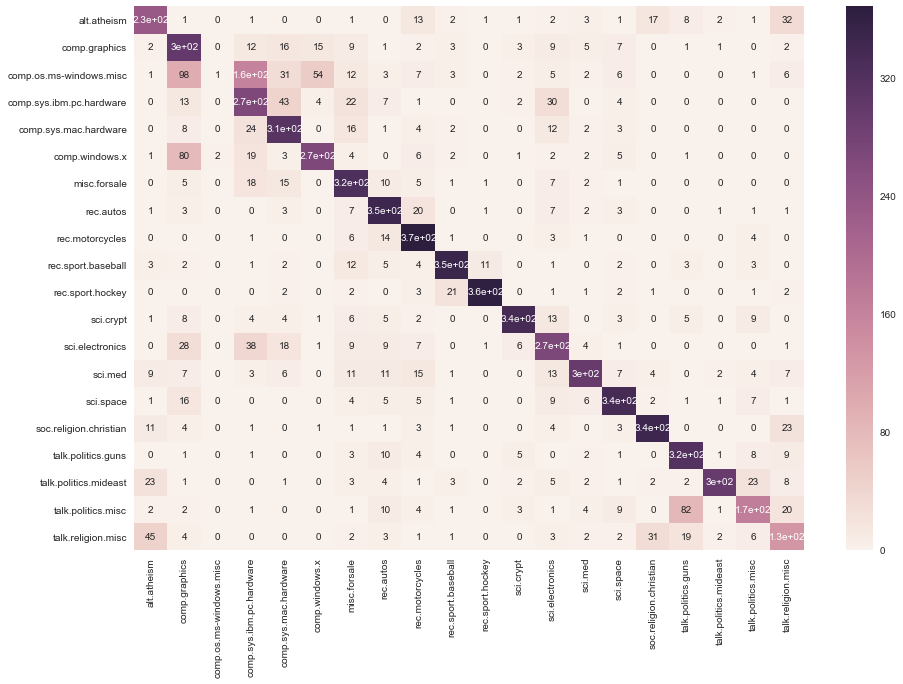

In [16]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(Y_test, y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(confusion, annot = True, yticklabels=labels,xticklabels=labels)

### SVM

In [17]:
from sklearn.svm import SVC
svm = SVC(C=100)
svm.fit(X_train, Y_train)
print(" train set accuracy: {:.2f}".format(svm.score(X_train, Y_train)))
print(" test set accuracy: {:.2f}".format(svm.score(X_test, Y_test)))

 train set accuracy: 0.99
 test set accuracy: 0.74


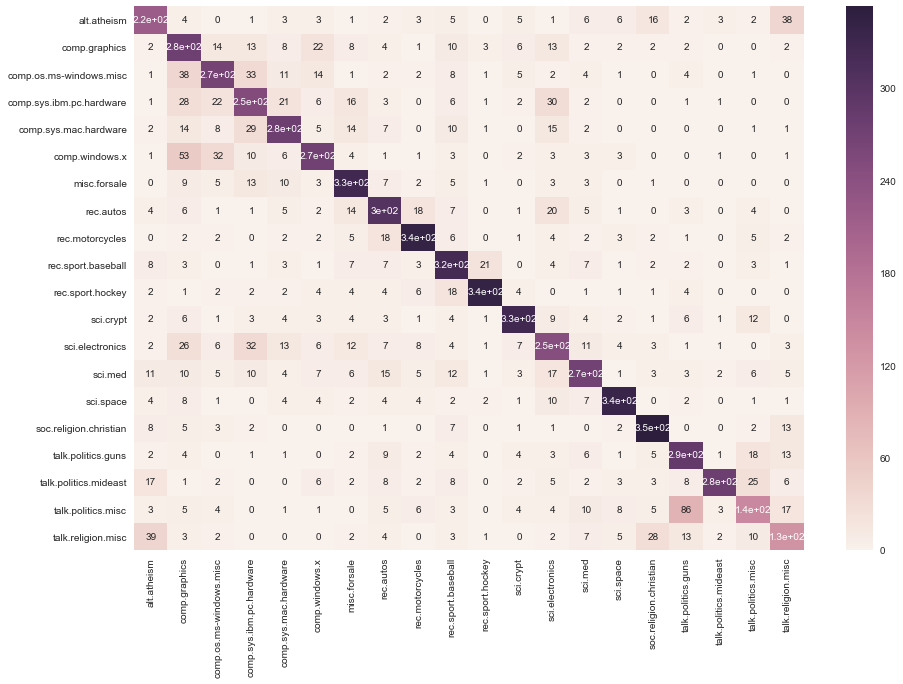

In [18]:
from sklearn.metrics import confusion_matrix
y_svmscores=np.array(svm.predict(X_test))
confusion = confusion_matrix(Y_test, y_svmscores)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(confusion, annot = True, yticklabels=labels,xticklabels=labels)

### ROC CURVE for MultinomialNB,SVM and LogisticRegression

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random
y_true=np.array(Y_test)
y_scores=np.array(y_pred)
y_logscores=np.array(logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, y_scores ,pos_label=18)
logfpr, logtpr, logthresholds = roc_curve(y_true, y_logscores ,pos_label=18)
svmfpr, svmtpr, svmthresholds = roc_curve(y_true, y_svmscores ,pos_label=18)
roc_auc = auc(fpr, tpr)
log_roc_auc = auc(logfpr, logtpr)
svm_roc_auc = auc(svmfpr, svmtpr)
print("MulNB_roc_auc:\n{}".format(roc_auc))
print("log_roc_auc:\n{}".format(log_roc_auc))
print("svm_roc_auc:\n{}".format(svm_roc_auc))
#print("fpr:\n{}".format(fpr)) 
#print("tpr:\n{}".format(tpr))
#print("thresholds:\n{}".format(thresholds))

MulNB_roc_auc:
0.8924042575999858
log_roc_auc:
0.8826868618289991
svm_roc_auc:
0.8624608052456204


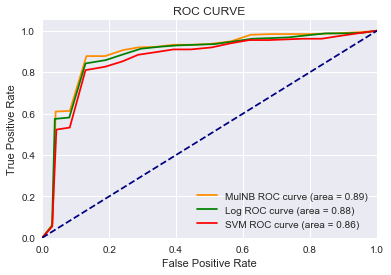

In [20]:
plt.plot(fpr, tpr, color='darkorange', label='MulNB ROC curve (area = %0.2f)' % roc_auc)
plt.plot(logfpr, logtpr, color='green', label='Log ROC curve (area = %0.2f)' % log_roc_auc)
plt.plot(svmfpr, svmtpr, color='red', label='SVM ROC curve (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### ELM

In [21]:
%%time
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf.fit(X_train, Y_train)
y_pred =np.array(clf.predict(X_test))
print("Training set score: {:.3f}".format(clf.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(clf.score(X_test, Y_test)))


Training set score: 0.844
Test set score: 0.694
Wall time: 3.98 s


In [22]:
import scipy
L = 100   # number of additional features
W = np.random.randn(X_train.shape[1], L)
bias = np.random.randn(1, L)

In [23]:
X_new_train = np.hstack((X_train, 
                           np.tanh(X_train.dot(W) + bias)))
X_new_test = np.hstack((X_test,
                          np.tanh(X_test.dot(W) + bias)))

In [24]:
%%time
model = BernoulliNB().fit(X_new_train, Y_train)
print("Test set score: {:.3f}".format(model.score(X_new_test, Y_test)))


Test set score: 0.701
Wall time: 1.98 s


### pipeline and  GridSearchCV

In [25]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np 

In [26]:
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train', shuffle=True)

In [27]:
twenty_train.target_names #prints all the categories
print("\n".join(twenty_train.data[0].split("\n")[:3])) #prints first line of the first data file

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
X_train_counts.shape

(11314, 130107)

In [29]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(11314, 130107)

In [30]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [31]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
 ])
text_clf = text_clf.fit(twenty_train.data, twenty_train.target)

In [32]:
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', shuffle=True)
predicted = text_clf.predict(twenty_test.data)
np.mean(predicted == twenty_test.target)

0.7738980350504514

In [33]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                             ('tfidf', TfidfTransformer()),
                             ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                                   alpha=1e-3, n_iter=5, random_state=42)),
 ])
_= text_clf_svm.fit(twenty_train.data, twenty_train.target)
predicted_svm = text_clf_svm.predict(twenty_test.data)
np.mean(predicted_svm == twenty_test.target)

0.82381837493361654

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
               'tfidf__use_idf': (True, False),
             'clf__alpha': (1e-2, 1e-3),
 }

In [35]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(twenty_train.data, twenty_train.target)

In [36]:
gs_clf.best_score_

0.90675269577514583

In [37]:
gs_clf.best_params_

{'clf__alpha': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}